<center>
    <h3>Modelos Descriptivos y Predictivos II</h3>
    <h3>Grado en Ciencia de Datos</h3>
    <h3>Universitat Politècnica de València</h3>
    <h1>Trabajo Práctico</h1>
</center>

<a id='indice'></a>
## Índice
1. ### [Objetivos](#objetivos)
1. ### [Librerías python para clasificación](#librerias)
1. ### [Descripción de la tarea](#desc)
1. ### [Descripción del dataset](#dataset)
1. ### [Lectura de datos](#lectura)
1. ### [Problema propuesto](#problema)
1. ### [Evaluación](#evaluacion)

<a id='objetivos'></a>
### Objetivos formativos
- Diseñar un experimento de clasificación en una apliación práctica
- Analizar los resultados obtenidos en un problema de clasificación

<a id='librerias'></a>
### Librerías python para problemas de clasificación

Librerías de aprendizaje automático, entrada-salida, procesamiento de vectores (arrays), representación, visión por computador:

- NumPy: https://numpy.org/devdocs/contents.html
- SciPy: https://www.scipy.org/
- scikit-learn (utiliza las dos anteriores): https://scikit-learn.org/stable/
- Keras: https://keras.io
- Pandas: https://pandas.pydata.org/
- Matplotlib: https://matplotlib.org/
- OpenCV: https://pypi.org/project/opencv-python/

<a id='desc'></a>
### Descripción de la tarea

El propósito de este proyecto es **desarrollar un sistema de clasificación de manos humanas**. Este sistema debe funcionar con imágenes almacenadas en archivos JPG y su propósito es clasificar las imágenes en cuatro posibles categorías:

- Mano izquierda, vista posterior [LB]
- Mano izquierda, vista anterior [LF]
- Mano derecha, vista posterior [RB]
- Mano derecha, vista anterior [RF]

<a id='dataset'></a>
### Descripción del dataset

El primer paso para desarrollar este proyecto es disponer de una base de datos convenientemente anotada. Para ello se proporciona el dataset HANDS disponible en [http://www.prhlt.upv.es/~jandreu/HANDS-DB](http://www.prhlt.upv.es/~jandreu/HANDS-DB). 

Esta base de datos contiene una serie de imágenes de manos en formato JPG. El nombre de los ficheros sigue el patrón `NNNN_LL.JPG` donde:

- `NNNN` es un código numérico
- `LL` es la etiqueta de clase asociada a dicha imagen y será alguno de los valores definidos anteriormente (LB, LF, RB o RF).


<a id='lectura'></a>
### Lectura de datos

El siguiente script permite leer las distintas imágenes JPG y su 
etiqueta asociada:

Image: 0093_RB.jpg Label: RB


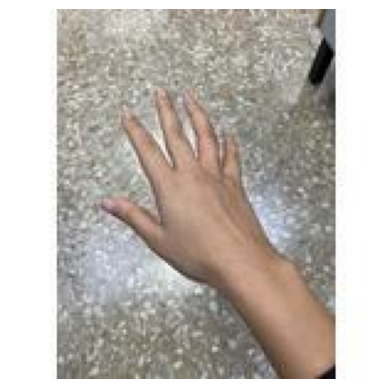

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

dataset_path = 'HANDS' # Cambiar si las  imágenes se encuentran en otra carpeta

for filename in os.listdir(dataset_path):
    # Obtener etiqueta
    img_label = filename[5:7]
    
    # Leer imagen
    img_path = os.path.join(dataset_path, filename)
    with open(img_path) as infile:
        img = cv2.imread(img_path)

    
    # Convertir imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar etiqueta
    print(f'Image: {filename} Label: {img_label}')

    # Mostrar imagen
    plt.imshow(img_rgb)
    plt.axis('off') 
    plt.show()
    
    break # Mostramos solo una imagen a modo de ejemplo

<a id='problema'></a>
### Problema propuesto

Se propone un problema de clasificación consiste en asignar una de las siguientes etiquetas de clase a una imagen dada. 

- LB: Vista posterior de la mano izquierda
- LF: Vista anterior de la mano izquierda
- RB: Vista posterior de la mano derecha
- RF: Vista anterior de la mano derecha


Puesto que la talla de las imágenes puede ser grande para
esta tarea es aconsejable reducir la dimensión de las mismas. Se
pueden probar diferentes estrategias como PCA o bien obtener una
representación en forma de *patches*. La librería
[scikit-learn](https://scikit-learn.org/) tiene alguna [función](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.extract_patches_2d.html)
para este propósito. Cada *patch* extraido puede utilizarse para
obtener alguna característica, como por ejemplo, la media de colores
del *patch*.

Se pide estudiar esta última propuesta para realizar una tarea de clasificación.

##### Extracción de características

La extracción o selección de característica en la tarea de
clasificación de imágenes de manos se puede abordar de diferentes
maneras. 

En este trabajo se propone un método basado en lo que se conoce como **Bag of Visual Words (BoVW)**, un concepto derivado del **Bag of Words (BoW)** utilizado en procesamiento de texto. Básicamente el proceso consiste en extraer pequeños trozos de imagen (*patches*) que sean discriminativos y representar posteriormente la imagen en función de estos *patches*. A continuación se explica con mayor detalle el método propuesto:

1. De cada imagen se extraen $50$ rectángulos de $5 \times 5$ (*patches*) de posiciones aleatorias. Esto permite capturar características locales de distintas partes de la imagen. Todos estos *patches* de cada imagen se van concatenando en un único array *numpy*.

1. Los valores de este array se normalizan para asegurarnos de que las características tengan la misma escala (media 0 y desviación estándar 1).


1. Sobre todos estos *patches* se realiza un proceso de *clustering* empleando para ello el algoritmo de *k-means*. En este caso definimos 81 *clusters*. Cada uno de estos clústers actúa como una **visual word**, representando patrones comunes en los *patches*. Dicho de otro modo, los 81 clústeres forman un vocabulario visual que describe las características típicas del conjunto de datos.

1. Tras este proceso cada imagen queda representada por un vector de índices, donde cada índice corresponde al clúster al que pertenece uno de sus *patches*. Esto convierte cada imagen en una secuencia de **visual words**, similar a cómo el modelo **Bag of Words** representa documentos de texto. Este es un número de características es mucho menor que utilizar la imagen en bruto, en cuyo caso quedaría representada por un vector de talla $150 \times 150 \times 3$ (número de píxeles por número de canales).

Finalmente, cabe destacar que para la realización del trabajo, cada alumno podrá emplear este mismo método, o cualquier otro que considere conveniente.

[MiniBatchKMeans] Reassigning 17 cluster centers.


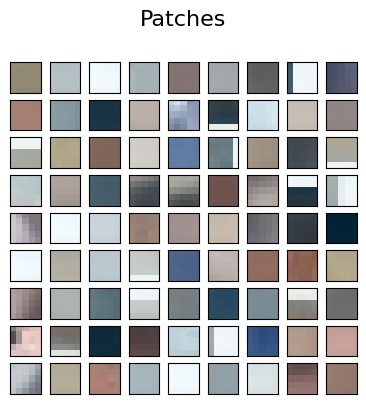

In [3]:
import cv2
import numpy as np
import os
from sklearn.feature_extraction import image
from sklearn.cluster import MiniBatchKMeans
dataset_path = 'HANDS'   # Cambiar por la carpeta en la que se encuentran las imágenes
 
jpgFiles = [fJPG for fJPG in os.listdir(dataset_path) if fJPG.endswith('.jpg')]
pSize = (5, 5)
bufferData = []

# Extraer 50 patches aleatorios de cada imagen
for filename in jpgFiles:
    img_path = os.path.join(dataset_path, filename)
    with open(img_path) as infile:
        # Obtener etiqueta
        img_label = filename[5:7] 
        # Leer imagen
        img = cv2.imread(img_path)
        # Convertir imagen de BGR a RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Extraer patches  
        patches = image.extract_patches_2d(img_rgb, pSize, max_patches=50, random_state=0) # shape = (50,5,5,3)
        patches = np.reshape(patches, (len(patches), -1)) # shape = (50,75)
        bufferData.append(patches)
        
# Normalizar patches
dataIm = np.concatenate(bufferData, axis=0) # shape = (1000,75)  50 patches x 200 imágenes = 1000 patches
dataIm = dataIm.astype(float)
dataIm -= np.mean(dataIm, axis=0)
dataIm /= np.std(dataIm, axis=0)

# Aplicar algoritmo de k-means para agrupar los patches en 81 clusters
kmeans = MiniBatchKMeans(n_clusters=81, random_state=0, verbose=True)
kmeans.partial_fit(dataIm) 

# Obtener la etiqueta de cada patche (índice de cluster al que pertenece)
X = np.reshape(kmeans.labels_ , (len(jpgFiles),50)) # Indice de cluster de cada patch. shape = (200,50) 200 imágenes x 50 patches

# Representar visualmente los centroides de cada cluster
min_value = kmeans.cluster_centers_.min()
max_value = kmeans.cluster_centers_.max()
import matplotlib.pyplot as plt
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    # plot centroids to have a visual view
    plt.subplot(9, 9, i + 1)
    patch = (patch - min_value) / (max_value - min_value)
    #patch = (patch - patch.min()) / (patch.max() - patch.min())
    plt.imshow(patch.reshape((5,5,3)), interpolation="nearest")
    plt.xticks(()); plt.yticks(())
plt.suptitle(
    "Patches",
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

El resultado de ejecutar el código anterior es una figura con 81 imágenes. Cada una de estas imágenes es una representación visual de los 81 centroides obtenidos con el algorimo *k-means*.

Una vez obtenemos el resultado, cada imagen se puede representar con un vector de talla 50. Por ejemplo, la imagen siguiente:

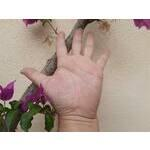

tendría una representación en términos de las etiquetas de los
clusters como: 

$[69, 36, 37, 63, 3, 79, 5, 4, 63, 42, 3, 63, 68, 76, 63, 44, 24, 63, 63, 3, 4, 36, 25, 23, 49,$
$3, 41, 3, 42, 37, 9, 37, 7, 37, 5, 5, 37, 3, 36, 32, 42, 3, 63, 25, 27, 36, 3, 63, 76, 42]$

y su etiqueta de clase sería **LF**. 

Por último basta ejecutar la siguiente instrucción para dejar los datos listos:

`X = np.reshape(kmeans.labels_ , (len(jpgFiles),50))`

<a id='evaluacion'></a>
### Evaluación

La evaluación de las prácticas (E5) se realizará como se describe a continuación:

1. La base de datos de entrenamiento puede descargarse de:
      [http://www.prhlt.upv.es/~jandreu/HANDS-DB](http://www.prhlt.upv.es/~jandreu/HANDS-DB). Se debe
      descargar la última versión.
      
1. Se debe preparar el mejor clasificador posible con cualquiera de las técnicas vistas en clase utilizando los datos de entrenamiento.

1. En una fecha concreta se enviará un correo a los alumnos informando de la disponibilidad de los datos de test. Estos estarán sin etiquetar.

1. Los alumnos deberán subir a una tarea de PoliformaT las etiquetas resultantes de clasificación de los datos de test. En dicha tarea se indicará la fecha tope de envio de resultados y el formato de envio. También deberá adjuntarse el script python que ha permitido obtener dicha clasificación. **El profesor debe ser capaz de generar esas mismas etiquetas ejecutando el código enviado.**

1. La nota de evaluación será función del resultado de clasificación obtenido sobre el conjunto de test.

1. Las etiquetas del conjunto de test se harán públicas tras concluir el periodo de envio de resultados.